###############################################################################################

## A1: Classification Model Development (Individual)
## Won Seok Hur
## Data set: Cross_Sell_Success_Dataset_2023.xlsx

################################################################################################

In [1022]:
# Import necessary libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder      # one-hot encoding
from sklearn.ensemble import RandomForestClassifier  # random forest classifier
from sklearn.ensemble import GradientBoostingClassifier  # gradient boosting classifier
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import accuracy_score                # accuracy score metric

In [1023]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [1024]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data_dic = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')

data_dic

,Feature,Data Type,Description
0,REVENUE,Float,Total revenue generated from each customer. No...
1,CROSS_SELL_SUCCESS,Integer,"Success of the cross-sell promotion (1 = yes, ..."
2,NAME,string,Full name of customer
3,EMAIL,string,Email of customer
4,FIRST_NAME,string,First name of customer
5,FAMILY_NAME,string,Last name of customer
6,TOTAL_MEALS_ORDERED,Integer,Total number of meals ordered by each customer...
7,UNIQUE_MEALS_PURCH,Integer,Number of unique meal sets ordered by each cus...
8,CONTACTS_W_CUSTOMER_SERVICE,Integer,Number of times each customer made contact wit...
9,PRODUCT_CATEGORIES_VIEWED,Integer,"Total number of meal categories viewed (vegan,..."


In [1025]:
# Import necessary libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import accuracy_score


# Set display options to view all columns and rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Read in data from Excel file
data = pd.read_excel('Cross_Sell_Success_Dataset_2023.xlsx')




data.head(n=10)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
5,0,rollam.westerling@jnj.com,2917.5,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16
6,0,utt@passport.com,3901.5,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584
7,0,bandy@aol.com,5000.0,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095
8,1,rickard.karstark@live.com,3090.0,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198
9,1,androw.frey@protonmail.com,5745.0,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664


#### The given code performs several feature engineering tasks on a dataset. First, it renames two columns that were mislabeled and contains spaces. Then, it creates four new columns by manipulating the values of four existing columns. One column, "AVG_MEAN_RATING," is rounded to the nearest whole number. The other three columns, "min_AVG_TIME_PER_SITE_VISIT," "min_AVG_PREP_VID_TIME," and "WEEKLY_PLAN," are converted to new units or multiplied by a factor of seven to make them more interpretable.

In [1026]:
# renaming mislabeled and columns with space
data = data.rename(columns={'LATE_DELIVERIES ':'LATE_DELIVERIES',
                     'LARGEST_ORDER_SIZE' : 'AVERAGE_NUM_MEALS'})

# rounding the average mean rating to the nearest integer
data["AVG_MEAN_RATING"] = data["AVG_MEAN_RATING"].round(0)

# converting the average time per site visit to minutes
data["min_AVG_TIME_PER_SITE_VISIT"] = data["AVG_TIME_PER_SITE_VISIT"].div(60).round(2)

# converting the average preparation video time to minutes
data["min_AVG_PREP_VID_TIME"] = data["AVG_PREP_VID_TIME"].div(60).round(2)


# converting weekly plan to weekly days
data['WEEKLY_PLAN'] = data["WEEKLY_PLAN"] * 7 

#### Next, the code extracts domain names from email addresses in the "EMAIL" column and stores them in a new column called "domain." It then creates three one-hot encoded columns based on the domain names. The three classes are "professional," "personal," and "junk." For each row, the code checks whether the domain name belongs to one of the three classes and assigns a value of 1 to the corresponding column and 0 to the others.

In [1027]:
# extract domain names and store them in a new column
domains = []
# looping just the domain name in Email colunm
for email in data['EMAIL']:
    domain = email.split('@')[1].split('.')[0]
    domains.append(domain)
# create new colunm domain
data['domain'] = domains
# value count new colunm
data['domain'].value_counts().sum()

1946

#### These new columns are concatenated with the original data, and the resulting dataset contains the one-hot encoded columns and the original data.

In [1028]:
# Create a one-hot encoding for the professional email class
professional_domains = ['mmm', 'amex', 'apple', 'boeing', 'caterpillar', 'chevron', 'cisco', 'cocacola', 'disney', 'dupont', 'exxon', 'ge', 'goldmansacs', 'homedepot', 'ibm', 'intel', 'jnj', 'jpmorgan', 'mcdonalds', 'merck', 'microsoft', 'nike', 'pfizer', 'pg', 'travelers', 'unitedtech', 'unitedhealth', 'verizon', 'visa', 'walmart']
professional_one_hot = pd.get_dummies(data['domain'].str.split('.', expand=True)[0].isin(professional_domains)).astype(int)

# Create a one-hot encoding for the personal email class
personal_domains = ['gmail', 'yahoo', 'protonmail']
personal_one_hot = pd.get_dummies(data['domain'].str.split('.', expand=True)[0].isin(personal_domains)).astype(int)

# Create a one-hot encoding for the junk email class
junk_domains = ['me', 'aol', 'hotmail', 'live', 'msn', 'passport']
junk_one_hot = pd.get_dummies(data['domain'].str.split('.', expand=True)[0].isin(junk_domains)).astype(int)

# Concatenate the original data with the one-hot encoded columns
data = pd.concat([data, professional_one_hot.add_prefix('professional_'), personal_one_hot.add_prefix('personal_'), junk_one_hot.add_prefix('junk_')], axis=1)

# drop repeated colunms
data = data.drop(['professional_False', 'personal_False',  'junk_False'], axis=1)


In [1029]:
data.describe()

,CROSS_SELL_SUCCESS,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,AVERAGE_NUM_MEALS,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,min_AVG_TIME_PER_SITE_VISIT,min_AVG_PREP_VID_TIME,professional_True,personal_True,junk_True
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,0.678828,2107.292652,74.634121,6.983556,4.904933,5.383864,150.556578,1.570915,5.515930,1.476362,79.309353,2.053443,99.604651,4.437307,3.480987,113.151593,2.509296,1.660108,0.357657,0.442446,0.199897
std,0.467047,1138.290709,55.309782,2.281193,2.502175,3.044001,49.447180,1.611130,0.580757,0.527600,95.013120,3.788933,62.341756,1.549666,0.658657,177.152284,0.824051,1.039049,0.479434,0.496804,0.400026
min,0.000000,131.000000,11.000000,1.000000,1.000000,1.000000,33.400000,0.000000,4.000000,0.000000,0.000000,0.000000,10.330000,1.000000,1.000000,1.000000,0.560000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1350.000000,39.000000,5.000000,3.000000,3.000000,114.400000,0.000000,5.000000,1.000000,7.000000,0.000000,72.000000,3.000000,3.000000,10.000000,1.910000,1.200000,0.000000,0.000000,0.000000
50%,1.000000,1740.000000,60.000000,7.000000,5.000000,5.000000,145.600000,1.000000,6.000000,1.000000,49.000000,0.000000,94.160000,4.000000,3.000000,17.000000,2.430000,1.570000,0.000000,0.000000,0.000000
75%,1.000000,2670.000000,95.000000,8.000000,7.000000,8.000000,173.775000,2.000000,6.000000,2.000000,91.000000,3.000000,117.287500,5.000000,4.000000,174.000000,2.900000,1.950000,1.000000,1.000000,0.000000
max,1.000000,8793.750000,493.000000,18.000000,19.000000,10.000000,564.200000,13.000000,7.000000,3.000000,364.000000,18.000000,1645.600000,11.000000,5.000000,1600.000000,9.400000,27.430000,1.000000,1.000000,1.000000


In [1030]:
# Convertin REVENUE in to different classes
# REVENUE placeholder variables
data['low_REVENUE'] = 0
data['med_REVENUE']     = 0
data['high_REVENUE']    = 0
data['very_REVENUE']    = 0


# looping with iterrows 
for index, value in data.iterrows():
    

    # REVENUE
    if data.loc[index, 'REVENUE'] >= 0 and data.loc[index, 'REVENUE'] < 1350:
        data.loc[index, 'low_REVENUE'] = 1
           
   # REVENUE
    if data.loc[index, 'REVENUE'] >= 1350 and data.loc[index, 'REVENUE'] < 1740:
        data.loc[index, 'med_REVENUE'] = 1
       # REVENUE 
    if data.loc[index, 'REVENUE'] >= 1740 and data.loc[index, 'REVENUE'] < 2670:
        data.loc[index, 'high_REVENUE'] = 1
        # REVENUE
    if data.loc[index, 'REVENUE'] >= 8793 :
        data.loc[index, 'very_REVENUE'] = 1           
    

In [1031]:
# Convertin TOTAL_MEALS_ORDEREDin to different classes
# TOTAL_MEALS_ORDERED placeholder variables
data['low_TOTAL_MEALS_ORDERED'] = 0
data['med_TOTAL_MEALS_ORDERED']     = 0
data['high_TOTAL_MEALS_ORDERED']    = 0
data['very_TOTAL_MEALS_ORDERED']    = 0


# looping with iterrows 
for index, value in data.iterrows():
    

    # TOTAL_MEALS_ORDERED
    if data.loc[index, 'TOTAL_MEALS_ORDERED'] >= 0 and data.loc[index, 'TOTAL_MEALS_ORDERED'] < 39:
        data.loc[index, 'low_TOTAL_MEALS_ORDERED'] = 1
           
    # TOTAL_MEALS_ORDERED
    if data.loc[index, 'TOTAL_MEALS_ORDERED'] >= 39 and data.loc[index, 'TOTAL_MEALS_ORDERED'] < 60:
        data.loc[index, 'med_TOTAL_MEALS_ORDERED'] = 1
      # TOTAL_MEALS_ORDERED  
    if data.loc[index, 'TOTAL_MEALS_ORDERED'] >= 60 and data.loc[index, 'TOTAL_MEALS_ORDERED'] < 95:
        data.loc[index, 'high_TOTAL_MEALS_ORDERED'] = 1
      # TOTAL_MEALS_ORDERED  
    if data.loc[index, 'TOTAL_MEALS_ORDERED'] >= 95 :
        data.loc[index, 'very_TOTAL_MEALS_ORDERED'] = 1

In [1032]:
# Convertin AVG_TIME_PER_SITE_VISIT in to different classes
# AVG_TIME_PER_SITE_VISIT placeholder variables
data['low_AVG_TIME_PER_SITE_VISIT'] = 0
data['med_AVG_TIME_PER_SITE_VISIT']     = 0
data['high_AVG_TIME_PER_SITE_VISIT']    = 0

# looping with iterrows 
for index, value in data.iterrows():
    

    # AVG_TIME_PER_SITE_VISIT
    if data.loc[index, 'AVG_TIME_PER_SITE_VISIT'] >= 0 and data.loc[index, 'AVG_TIME_PER_SITE_VISIT'] < 115:
        data.loc[index, 'low_AVG_TIME_PER_SITE_VISIT'] = 1
        
        
    # AVG_TIME_PER_SITE_VISIT
    if data.loc[index, 'AVG_TIME_PER_SITE_VISIT'] >= 115 and data.loc[index, 'AVG_TIME_PER_SITE_VISIT'] < 180:
        data.loc[index, 'med_AVG_TIME_PER_SITE_VISIT'] = 1
        
        
    # AVG_TIME_PER_SITE_VISIT
    if data.loc[index, 'AVG_TIME_PER_SITE_VISIT'] >= 180:
        data.loc[index, 'high_AVG_TIME_PER_SITE_VISIT'] = 1

In [1033]:
# Convertin AVG_PREP_VID_TIME in to different classes
# AVG_PREP_VID_TIME placeholder variables
data['short_AVG_PREP_VID_TIME'] = 0
data['med_AVG_PREP_VID_TIME']     = 0
data['long_AVG_PREP_VID_TIME']    = 0
data['out_AVG_PREP_VID_TIME']    = 0



for index, value in data.iterrows():
    

    # AVG_PREP_VID_TIME
    if data.loc[index, 'AVG_PREP_VID_TIME'] >= 0 and data.loc[index, 'AVG_PREP_VID_TIME'] < 7:
        data.loc[index, 'short_AVG_PREP_VID_TIME'] = 1
           
    # AVG_PREP_VID_TIME
    if data.loc[index, 'AVG_PREP_VID_TIME'] >= 73 and data.loc[index, 'AVG_PREP_VID_TIME'] < 100:
        data.loc[index, 'med_AVG_PREP_VID_TIME'] = 1
     # AVG_PREP_VID_TIME   
    if data.loc[index, 'AVG_PREP_VID_TIME'] >= 100 and data.loc[index, 'AVG_PREP_VID_TIME'] < 130:
        data.loc[index, 'long_AVG_PREP_VID_TIME'] = 1
      # AVG_PREP_VID_TIME  
    if data.loc[index, 'AVG_PREP_VID_TIME'] >= 130 :
        data.loc[index, 'out_AVG_PREP_VID_TIME'] = 1

In [1034]:
# placeholder variables
data['no_WEEKLY_PLAN'] = 0
data['short_WEEKLY_PLAN'] = 0
data['med_WEEKLY_PLAN']     = 0
data['long_WEEKLY_PLAN']    = 0

for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'WEEKLY_PLAN'] == 0 :
        data.loc[index, 'no_WEEKLY_PLAN'] = 1
        
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'WEEKLY_PLAN'] >= 1 and data.loc[index, 'WEEKLY_PLAN'] < 7:
        data.loc[index, 'short_WEEKLY_PLAN'] = 1
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'WEEKLY_PLAN'] >= 7 and data.loc[index, 'WEEKLY_PLAN'] < 14:
        data.loc[index, 'med_WEEKLY_PLAN'] = 1
    
    # LATE_DELIVERIES
    if data.loc[index, 'LATE_DELIVERIES'] >= 14:
        data.loc[index, 'high_CANCELLATIONS_AFTER_NOON'] = 1

In [1035]:
# placeholder variables
data['low_TOTAL_PHOTOS_VIEWED'] = 0
data['med_TOTAL_PHOTOS_VIEWED']     = 0
data['high_TOTAL_PHOTOS_VIEWED']    = 0
data['very_TOTAL_PHOTOS_VIEWED']    = 0



for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'TOTAL_PHOTOS_VIEWED'] >= 0 and data.loc[index, 'TOTAL_PHOTOS_VIEWED'] < 20:
        data.loc[index, 'low_TOTAL_PHOTOS_VIEWED'] = 1
           
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'TOTAL_PHOTOS_VIEWED'] >= 20 and data.loc[index, 'TOTAL_PHOTOS_VIEWED'] < 100:
        data.loc[index, 'med_TOTAL_PHOTOS_VIEWED'] = 1
        
    if data.loc[index, 'TOTAL_PHOTOS_VIEWED'] >= 100 and data.loc[index, 'TOTAL_PHOTOS_VIEWED'] < 230:
        data.loc[index, 'high_TOTAL_PHOTOS_VIEWED'] = 1
        
    if data.loc[index, 'TOTAL_PHOTOS_VIEWED'] >= 230 :
        data.loc[index, 'very_TOTAL_PHOTOS_VIEWED'] = 1

#### One reason for binning is to reduce noise and improve the signal-to-noise ratio in the data. In other words, by grouping similar values of a feature together, the data becomes less granular and more interpretable. For instance, the "CONTACTS_W_CUSTOMER_SERVICE" feature could take on a wide range of values. However, by creating the new columns, this feature is now split into three distinct ranges, making it easier to see how the feature relates to the target variable. This process can help the model to identify more meaningful patterns in the data, leading to better predictive performance.

In [1036]:
# placeholder variables
data['low_CONTACTS_W_CUSTOMER_SERVICE'] = 0
data['med_CONTACTS_W_CUSTOMER_SERVICE']     = 0
data['high_CONTACTS_W_CUSTOMER_SERVICE']    = 0

for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] >= 0 and data.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < 3:
        data.loc[index, 'low_CONTACTS_W_CUSTOMER_SERVICE'] = 1
        
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] >= 3 and data.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < 7:
        data.loc[index, 'med_CONTACTS_W_CUSTOMER_SERVICE'] = 1
        
        
    # LATE_DELIVERIES
    if data.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] >= 7:
        data.loc[index, 'high_CONTACTS_W_CUSTOMER_SERVICE'] = 1

In [1037]:
# check correlation with the target
data.corr()['CROSS_SELL_SUCCESS']

CROSS_SELL_SUCCESS                  1.000000
REVENUE                             0.004540
TOTAL_MEALS_ORDERED                 0.006475
UNIQUE_MEALS_PURCH                  0.036541
CONTACTS_W_CUSTOMER_SERVICE        -0.000183
PRODUCT_CATEGORIES_VIEWED           0.004671
AVG_TIME_PER_SITE_VISIT             0.032115
CANCELLATIONS_AFTER_NOON            0.142681
PC_LOGINS                           0.044462
MOBILE_LOGINS                       0.062023
WEEKLY_PLAN                        -0.005337
LATE_DELIVERIES                     0.023941
AVG_PREP_VID_TIME                   0.011117
AVERAGE_NUM_MEALS                   0.022247
AVG_MEAN_RATING                    -0.032396
TOTAL_PHOTOS_VIEWED                 0.010047
min_AVG_TIME_PER_SITE_VISIT         0.032061
min_AVG_PREP_VID_TIME               0.011122
professional_True                   0.194102
personal_True                       0.038841
junk_True                          -0.280870
low_REVENUE                        -0.032705
med_REVENU

In [1038]:
# checking the info to see if there is a null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CROSS_SELL_SUCCESS                1946 non-null   int64  
 1   EMAIL                             1946 non-null   object 
 2   REVENUE                           1946 non-null   float64
 3   TOTAL_MEALS_ORDERED               1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH                1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE       1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED         1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT           1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON          1946 non-null   int64  
 9   PC_LOGINS                         1946 non-null   int64  
 10  MOBILE_LOGINS                     1946 non-null   int64  
 11  WEEKLY_PLAN                       1946 non-null   int64  
 12  LATE_D

In [1039]:
# check y data's value count
data.loc[ : ,'CROSS_SELL_SUCCESS'].value_counts(normalize = True).round(decimals = 2)

1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64

CROSS_SELL_SUCCESS         # y_variable     
EMAIL                      # maybe something I can do with domain adress?          
REVENUE                    # (continous data)    
TOTAL_MEALS_ORDERED        # (continous data)    
UNIQUE_MEALS_PURCH         # (count data) 

CONTACTS_W_CUSTOMER_SERVICE    
PRODUCT_CATEGORIES_VIEWED      
AVG_TIME_PER_SITE_VISIT        
CANCELLATIONS_AFTER_NOON       
PC_LOGINS                      
MOBILE_LOGINS                  
WEEKLY_PLAN                    
LATE_DELIVERIES               
AVG_PREP_VID_TIME              
LARGEST_ORDER_SIZE             
AVG_MEAN_RATING                
TOTAL_PHOTOS_VIEWED            

encoder = OneHotEncoder()

# Fit and transform the categorical data
one_hot = encoder.fit_transform(data[['domain']])

# Convert the sparse matrix to a dense numpy array
one_hot_arr = one_hot.toarray()

# Convert the one-hot encoded array to a new dataframe
one_hot_df = pd.DataFrame(one_hot_arr, columns=encoder.get_feature_names(['domain']))

# Concatenate the one-hot encoded dataframe with the original data
data = pd.concat([data, one_hot_df], axis=1)

data

In [1040]:
# data columns to list
data.columns.to_list()

['CROSS_SELL_SUCCESS',
 'EMAIL',
 'REVENUE',
 'TOTAL_MEALS_ORDERED',
 'UNIQUE_MEALS_PURCH',
 'CONTACTS_W_CUSTOMER_SERVICE',
 'PRODUCT_CATEGORIES_VIEWED',
 'AVG_TIME_PER_SITE_VISIT',
 'CANCELLATIONS_AFTER_NOON',
 'PC_LOGINS',
 'MOBILE_LOGINS',
 'WEEKLY_PLAN',
 'LATE_DELIVERIES',
 'AVG_PREP_VID_TIME',
 'AVERAGE_NUM_MEALS',
 'AVG_MEAN_RATING',
 'TOTAL_PHOTOS_VIEWED',
 'min_AVG_TIME_PER_SITE_VISIT',
 'min_AVG_PREP_VID_TIME',
 'domain',
 'professional_True',
 'personal_True',
 'junk_True',
 'low_REVENUE',
 'med_REVENUE',
 'high_REVENUE',
 'very_REVENUE',
 'low_TOTAL_MEALS_ORDERED',
 'med_TOTAL_MEALS_ORDERED',
 'high_TOTAL_MEALS_ORDERED',
 'very_TOTAL_MEALS_ORDERED',
 'low_AVG_TIME_PER_SITE_VISIT',
 'med_AVG_TIME_PER_SITE_VISIT',
 'high_AVG_TIME_PER_SITE_VISIT',
 'short_AVG_PREP_VID_TIME',
 'med_AVG_PREP_VID_TIME',
 'long_AVG_PREP_VID_TIME',
 'out_AVG_PREP_VID_TIME',
 'no_WEEKLY_PLAN',
 'short_WEEKLY_PLAN',
 'med_WEEKLY_PLAN',
 'long_WEEKLY_PLAN',
 'high_CANCELLATIONS_AFTER_NOON',
 'low_TOTA

In [1041]:
# prepare x variables colunm in a list
x_variable = [
                 
                 'REVENUE',
                 'TOTAL_MEALS_ORDERED',
                 'UNIQUE_MEALS_PURCH',
                 'CONTACTS_W_CUSTOMER_SERVICE',
                 'PRODUCT_CATEGORIES_VIEWED',
                 
                 'CANCELLATIONS_AFTER_NOON',
                 'PC_LOGINS',
                 'MOBILE_LOGINS',
                 'WEEKLY_PLAN',
                 'LATE_DELIVERIES',
                 
                 'AVERAGE_NUM_MEALS',
                 'AVG_MEAN_RATING',
                 'TOTAL_PHOTOS_VIEWED',
                 'min_AVG_TIME_PER_SITE_VISIT',
                 'min_AVG_PREP_VID_TIME',
                 
                 'professional_True',
                 'personal_True',
                 'junk_True',
                 'low_REVENUE',
                 'med_REVENUE',
                 'high_REVENUE',
                 'very_REVENUE',
                 'low_TOTAL_MEALS_ORDERED',
                 'med_TOTAL_MEALS_ORDERED',
                 'high_TOTAL_MEALS_ORDERED',
                 'very_TOTAL_MEALS_ORDERED',
                 'low_AVG_TIME_PER_SITE_VISIT',
                 'med_AVG_TIME_PER_SITE_VISIT',
                 'high_AVG_TIME_PER_SITE_VISIT',
                 'short_AVG_PREP_VID_TIME',
                 'med_AVG_PREP_VID_TIME',
                 'long_AVG_PREP_VID_TIME',
                 'out_AVG_PREP_VID_TIME',
                 'no_WEEKLY_PLAN',
                 'short_WEEKLY_PLAN',
                 'med_WEEKLY_PLAN',
                 'long_WEEKLY_PLAN',
                 'high_CANCELLATIONS_AFTER_NOON',
                 'low_TOTAL_PHOTOS_VIEWED',
                 'med_TOTAL_PHOTOS_VIEWED',
                 'high_TOTAL_PHOTOS_VIEWED',
                 'very_TOTAL_PHOTOS_VIEWED',
                 'low_CONTACTS_W_CUSTOMER_SERVICE',
                 'med_CONTACTS_W_CUSTOMER_SERVICE',
                 'high_CONTACTS_W_CUSTOMER_SERVICE']



In [1042]:
# store the colunms requires scale
need_to_scale = ['REVENUE',
 'TOTAL_MEALS_ORDERED',
 'UNIQUE_MEALS_PURCH',
 'CONTACTS_W_CUSTOMER_SERVICE',
 'PRODUCT_CATEGORIES_VIEWED',
 
 'CANCELLATIONS_AFTER_NOON',
 'PC_LOGINS',
 'MOBILE_LOGINS',
 'WEEKLY_PLAN',
 'LATE_DELIVERIES',
 
 'AVERAGE_NUM_MEALS',
 'AVG_MEAN_RATING',
 'TOTAL_PHOTOS_VIEWED',
  'min_AVG_TIME_PER_SITE_VISIT',
    'min_AVG_PREP_VID_TIME']

In [1043]:

# scale preparation replace 0 with 0.001 
for col in need_to_scale:
    data.loc[data[col] == 0, col] = 0.001



In [1044]:
# x_data = data.drop(['CROSS_SELL_SUCCESS', 'EMAIL', 'domain' ], axis=1)

# store the data needs to be scaled
data_scale = data.loc[ : , need_to_scale ]



In [1045]:
help(StandardScaler())

Help on StandardScaler in module sklearn.preprocessing._data object:

class StandardScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual fe

In [1046]:
# instantiating a StandardScaler object
scaler = StandardScaler()

# fitting and transforming the data with StandardScaler
x_scaled = scaler.fit_transform(data_scale)

# creating a new DataFrame with the scaled data and original column names
x_scaled_df = pd.DataFrame(x_scaled, columns=data_scale.columns)

# checking the results
x_scaled_df.describe().round(4)


,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVERAGE_NUM_MEALS,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,min_AVG_TIME_PER_SITE_VISIT,min_AVG_PREP_VID_TIME
count,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000
mean,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000
std,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003
min,-1.7366,-1.1508,-2.6237,-1.5610,-1.4405,-0.9750,-2.6109,-2.7972,-0.8349,-0.5421,-2.2187,-3.7677,-0.6332,-2.3661,-1.4345
25%,-0.6655,-0.6444,-0.8697,-0.7615,-0.7833,-0.9750,-0.8886,-0.9032,-0.7612,-0.5421,-0.9277,-0.7304,-0.5824,-0.7274,-0.4429
50%,-0.3228,-0.2647,0.0072,0.0380,-0.1261,-0.3547,0.8337,-0.9032,-0.3191,-0.5421,-0.2823,-0.7304,-0.5429,-0.0963,-0.0867
75%,0.4945,0.3683,0.4457,0.8375,0.8597,0.2663,0.8337,0.9928,0.1231,0.2497,0.3632,0.7882,0.3436,0.4742,0.2791
max,5.8756,7.5660,4.8305,5.6346,1.5169,7.0967,2.5561,2.8887,2.9971,4.2101,4.2360,2.3068,8.3952,8.3641,24.8078


In [1047]:
help(RobustScaler())

Help on RobustScaler in module sklearn.preprocessing._data object:

class RobustScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
 |  
 |  Scale features using statistics that are robust to outliers.
 |  
 |  This Scaler removes the median and scales the data according to
 |  the quantile range (defaults to IQR: Interquartile Range).
 |  The IQR is the range between the 1st quartile (25th quantile)
 |  and the 3rd quartile (75th quantile).
 |  
 |  Centering and scaling happen independently on each feature by
 |  computing the relevant statistics on the samples in the training
 |  set. Median and interquartile range are then stored to be used on
 |  later data using the :meth:`transform` method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators. Typically this is 

In [1048]:
from sklearn.preprocessing import RobustScaler
# instantiating a RobustScaler object
robustScaler = RobustScaler()
# fitting the data
robustScaler.fit(data_scale)
# trasforming the data to array
train_data_robustScaled = robustScaler.transform(data_scale)
# make the array to dataframe
x_scaled_df_ro = pd.DataFrame(train_data_robustScaled, columns=data_scale.columns)
# checking the results
x_scaled_df_ro.describe().round(4)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVERAGE_NUM_MEALS,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,min_AVG_TIME_PER_SITE_VISIT,min_AVG_PREP_VID_TIME
count,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000,1946.0000
mean,0.2783,0.2613,-0.0055,-0.0238,0.0768,0.2857,-0.4841,0.4764,0.3608,0.6846,0.2187,0.4810,0.5863,0.0801,0.1201
std,0.8623,0.9877,0.7604,0.6255,0.6088,0.8058,0.5808,0.5276,1.1311,1.2633,0.7748,0.6587,1.0802,0.8324,1.3854
min,-1.2189,-0.8750,-2.0000,-1.0000,-0.8000,-0.4997,-2.0000,-0.9990,-0.5833,0.0000,-1.5000,-2.0000,-0.0976,-1.8889,-1.8667
25%,-0.2955,-0.3750,-0.6667,-0.5000,-0.4000,-0.4997,-1.0000,0.0000,-0.5000,0.0000,-0.5000,0.0000,-0.0427,-0.5253,-0.4933
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.7045,0.6250,0.3333,0.5000,0.6000,0.5003,0.0000,1.0000,0.5000,1.0000,0.5000,1.0000,0.9573,0.4747,0.5067
max,5.3438,7.7321,3.6667,3.5000,1.0000,6.0030,1.0000,2.0000,3.7500,6.0017,3.5000,2.0000,9.6524,7.0404,34.4800


In [1049]:
# data that don't need scale list
data_1 = [
                 'CROSS_SELL_SUCCESS',
                 'professional_True',
                 'personal_True',
                 'junk_True',
                 'low_REVENUE',
                 'med_REVENUE',
                 'high_REVENUE',
                 'very_REVENUE',
                 'low_TOTAL_MEALS_ORDERED',
                 'med_TOTAL_MEALS_ORDERED',
                 'high_TOTAL_MEALS_ORDERED',
                 'very_TOTAL_MEALS_ORDERED',
                 'low_AVG_TIME_PER_SITE_VISIT',
                 'med_AVG_TIME_PER_SITE_VISIT',
                 'high_AVG_TIME_PER_SITE_VISIT',
                 'short_AVG_PREP_VID_TIME',
                 'med_AVG_PREP_VID_TIME',
                 'long_AVG_PREP_VID_TIME',
                 'out_AVG_PREP_VID_TIME',
                 'no_WEEKLY_PLAN',
                 'short_WEEKLY_PLAN',
                 'med_WEEKLY_PLAN',
                 'long_WEEKLY_PLAN',
                 'high_CANCELLATIONS_AFTER_NOON',
                 'low_TOTAL_PHOTOS_VIEWED',
                 'med_TOTAL_PHOTOS_VIEWED',
                 'high_TOTAL_PHOTOS_VIEWED',
                 'very_TOTAL_PHOTOS_VIEWED',
                 'low_CONTACTS_W_CUSTOMER_SERVICE',
                 'med_CONTACTS_W_CUSTOMER_SERVICE',
                 'high_CONTACTS_W_CUSTOMER_SERVICE']
# scaled data + data that don't require scale and make the final data for models
data_final = pd.concat([data.loc[:, data_1 ], x_scaled_df], axis = 1)
# check the final data
data_final.describe()

,CROSS_SELL_SUCCESS,professional_True,personal_True,junk_True,low_REVENUE,med_REVENUE,high_REVENUE,very_REVENUE,low_TOTAL_MEALS_ORDERED,med_TOTAL_MEALS_ORDERED,high_TOTAL_MEALS_ORDERED,very_TOTAL_MEALS_ORDERED,low_AVG_TIME_PER_SITE_VISIT,med_AVG_TIME_PER_SITE_VISIT,high_AVG_TIME_PER_SITE_VISIT,short_AVG_PREP_VID_TIME,med_AVG_PREP_VID_TIME,long_AVG_PREP_VID_TIME,out_AVG_PREP_VID_TIME,no_WEEKLY_PLAN,short_WEEKLY_PLAN,med_WEEKLY_PLAN,long_WEEKLY_PLAN,high_CANCELLATIONS_AFTER_NOON,low_TOTAL_PHOTOS_VIEWED,med_TOTAL_PHOTOS_VIEWED,high_TOTAL_PHOTOS_VIEWED,very_TOTAL_PHOTOS_VIEWED,low_CONTACTS_W_CUSTOMER_SERVICE,med_CONTACTS_W_CUSTOMER_SERVICE,high_CONTACTS_W_CUSTOMER_SERVICE,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVERAGE_NUM_MEALS,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,min_AVG_TIME_PER_SITE_VISIT,min_AVG_PREP_VID_TIME
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.0,1946.000000,1946.000000,1946.000000,1946.000000,1946.0,1946.000000,1946.0,23.0,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03
mean,0.678828,0.357657,0.442446,0.199897,0.242035,0.253340,0.252826,0.000514,0.236896,0.258993,0.249743,0.254368,0.253854,0.526721,0.219424,0.0,0.312950,0.269784,0.162898,0.240493,0.0,0.040082,0.0,1.0,0.563207,0.098150,0.156732,0.181912,0.176259,0.533402,0.290339,2.291190e-16,2.142285e-17,-1.381735e-16,4.017798e-15,-9.128247e-17,4.435757e-17,-6.776582e-16,2.138292e-16,-4.119121e-17,-3.434503e-16,2.942148e-16,-6.010951e-16,4.147647e-17,-7.311155e-17,-1.914650e-16
std,0.467047,0.479434,0.496804,0.400026,0.428425,0.435036,0.434744,0.022669,0.425287,0.438194,0.432976,0.435617,0.435327,0.499414,0.413963,0.0,0.463813,0.443962,0.369368,0.427493,0.0,0.196202,0.0,0.0,0.496116,0.297594,0.363641,0.385871,0.381138,0.499011,0.454036,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.736640e+00,-1.150800e+00,-2.623668e+00,-1.561017e+00,-1.440536e+00,-9.750249e-01,-2.610938e+00,-2.797223e+00,-8.349283e-01,-5.420850e-01,-2.218665e+00,-3.767706e+00,-6.332429e-01,-2.366111e+00,-1.434476e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.654603e-01,-6.444300e-01,-8.697491e-01,-7.615066e-01,-7.833366e-01,-9.750249e-01,-8.886041e-01,-9.031722e-01,-7.612457e-01,-5.420850e-01,-9.277330e-01,-7.304417e-01,-5.824261e-01,-7.274426e-01,-4.429303e-01
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-3.227533e-01,-2.646527e-01,7.210356e-03,3.800343e-02,-1.261376e-01,-3.546934e-01,8.337302e-01,-9.031722e-01,-3.190870e-01,-5.420850e-01,-2.822670e-01,-7.304417e-01,-5.429019e-01,-9.625174e-02,-8.674383e-02
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.0000

# Logistic Regression

#### The reason I start with a small logistic regression model and then build upon it is to simplify the model and avoid overfitting. Starting with a small set of variables allows us to identify the most important factors affecting the dependent variable and build a more parsimonious model. By gradually adding variables and assessing the impact on the model's performance, we can ensure that the model remains accurate and generalizable to new data.

#### Starting with a small model also helps to reduce the risk of overfitting, which can occur when a model is too complex and performs well on the training data but poorly on new, unseen data. By starting with a small model and gradually building upon it, we can ensure that the model remains interpretable, stable, and robust.

#### The variables included in the logistic regression model were chosen based on statistical significance, as determined by their p-values. A p-value less than 0.05 indicates that the variable is statistically significant in predicting the outcome variable, CROSS_SELL_SUCCESS.

#### In addition, the AIC  and BIC were used to evaluate the model fit. These measures help balance model complexity with goodness of fit, with lower values indicating better model performance. The AIC and BIC for the model were 2004.2803 and 2058.9597, respectively.

#### Finally, the gap between the AIC and BIC was also considered. A smaller gap between the two measures indicates a better fit for the model. In this case, the gap was 54.6794, suggesting that the model is not overfitting.

#### Based on these criteria, the selected variables were UNIQUE_MEALS_PURCH, CANCELLATIONS_AFTER_NOON, PC_LOGINS, MOBILE_LOGINS, professional_True, personal_True, med_REVENUE, high_REVENUE, and low_TOTAL_MEALS_ORDERED. These variables were found to be statistically significant in predicting CROSS_SELL_SUCCESS, while maintaining a balance between model complexity and goodness of fit.


In [1050]:
# x_data = data.drop(['CROSS_SELL_SUCCESS', 'EMAIL', 'domain'  ], axis=1)
# x_data = data.loc[ : , x_variable ]
# preparing x data for logistic regression
x_data_lo = data_final.drop(['CROSS_SELL_SUCCESS'], axis=1)
# preparing y data for logistic regression
y_data_lo = data_final.loc[ : , 'CROSS_SELL_SUCCESS']



In [1051]:
# train test split for logistic regression
x_train, x_test, y_train, y_test = train_test_split(x_data_lo, y_data_lo, test_size=0.10, random_state=219)

# merging training data for statsmodels
data_train = pd.concat([x_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.67
0    0.33
Name: CROSS_SELL_SUCCESS, dtype: float64



In [1052]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = 'CROSS_SELL_SUCCESS ~ professional_True',
                           data = data_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results summary2
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.608018
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit              Pseudo R-squared: 0.030     
Dependent Variable: CROSS_SELL_SUCCESS AIC:              2133.2788 
Date:               2023-02-15 23:54   BIC:              2144.2147 
No. Observations:   1751               Log-Likelihood:   -1064.6   
Df Model:           1                  LL-Null:          -1097.4   
Df Residuals:       1749               LLR p-value:      5.7081e-16
Converged:          1.0000             Scale:            1.0000    
No. Iterations:     5.0000                                         
--------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept           0.4618    0.0615  7.5098  0.0000  0.3413  0.5824
professional_True   0.9068    0.1162  7.8030  0.0000  0.6791  1.1346
===================================================================

"""


for x in x_variable:
    # Define the formula for the logistic regression model
    formula = 'CROSS_SELL_SUCCESS ~ ' + x
    
    # Fit the logistic regression model
    model = smf.logit(formula=formula, data=data).fit()
    
    # Print the results summary
    print('\n\nPredictor Variable:', x)
    print(model.summary2())

In [1053]:
# new x based on logistic regression
new_x_variable = ['REVENUE',
                 'TOTAL_MEALS_ORDERED',
                 'UNIQUE_MEALS_PURCH',
                 'CONTACTS_W_CUSTOMER_SERVICE',
                 'PRODUCT_CATEGORIES_VIEWED',
                 
                 'CANCELLATIONS_AFTER_NOON',
                 'PC_LOGINS',
                 'MOBILE_LOGINS',
                 'WEEKLY_PLAN',
                 'LATE_DELIVERIES',
                 
                 'AVERAGE_NUM_MEALS',
                 'AVG_MEAN_RATING',
                 'TOTAL_PHOTOS_VIEWED',
                 'min_AVG_TIME_PER_SITE_VISIT',
                 'min_AVG_PREP_VID_TIME',
                 
                 'professional_True',
                 'personal_True',
                 
                
                 'med_REVENUE',
                 'high_REVENUE',
                 'very_REVENUE',
                 'low_TOTAL_MEALS_ORDERED',
                 
                 
                 'very_TOTAL_MEALS_ORDERED',
                 
                 'med_AVG_TIME_PER_SITE_VISIT',
                 'high_AVG_TIME_PER_SITE_VISIT',
                 
                 'med_AVG_PREP_VID_TIME',
                 'long_AVG_PREP_VID_TIME',
                 'out_AVG_PREP_VID_TIME',
                 
                 
                 'med_WEEKLY_PLAN',
                 
                 
               
                 
                 ]

In [1054]:
# loop to see which single x variable's model output
for x in new_x_variable:
    # Define the formula for the logistic regression model
    formula = 'CROSS_SELL_SUCCESS ~ ' + x
    
    # Fit the logistic regression model
    model = smf.logit(formula=formula, data=data).fit()
    
    # Print the results summary
    print('\n\nPredictor Variable:', x)
    print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.627739
         Iterations 4


Predictor Variable: REVENUE
                          Results: Logit
Model:              Logit              Pseudo R-squared: 0.000    
Dependent Variable: CROSS_SELL_SUCCESS AIC:              2447.1607
Date:               2023-02-15 23:54   BIC:              2458.3077
No. Observations:   1946               Log-Likelihood:   -1221.6  
Df Model:           1                  LL-Null:          -1221.6  
Df Residuals:       1944               LLR p-value:      0.84110  
Converged:          1.0000             Scale:            1.0000   
No. Iterations:     4.0000                                        
--------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
--------------------------------------------------------------------
Intercept     0.7304     0.1023   7.1427   0.0000    0.5299   0.9308
REVENUE       0

                          Results: Logit
Model:              Logit              Pseudo R-squared: 0.000    
Dependent Variable: CROSS_SELL_SUCCESS AIC:              2446.2336
Date:               2023-02-15 23:54   BIC:              2457.3807
No. Observations:   1946               Log-Likelihood:   -1221.1  
Df Model:           1                  LL-Null:          -1221.6  
Df Residuals:       1944               LLR p-value:      0.32536  
Converged:          1.0000             Scale:            1.0000   
No. Iterations:     5.0000                                        
------------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
------------------------------------------------------------------
Intercept             0.6114   0.1474 4.1481 0.0000  0.3225 0.9003
AVERAGE_NUM_MEALS     0.0310   0.0316 0.9811 0.3266 -0.0309 0.0928

Optimization terminated successfully.
         Current function value: 0.627224
       

                          Results: Logit
Model:              Logit              Pseudo R-squared: 0.000    
Dependent Variable: CROSS_SELL_SUCCESS AIC:              2446.4258
Date:               2023-02-15 23:54   BIC:              2457.5729
No. Observations:   1946               Log-Likelihood:   -1221.2  
Df Model:           1                  LL-Null:          -1221.6  
Df Residuals:       1944               LLR p-value:      0.37867  
Converged:          0.0000             Scale:            1.0000   
No. Iterations:     35.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.    z    P>|z|    [0.025     0.975] 
------------------------------------------------------------------
Intercept     0.7476    0.0486 15.3977 0.0000     0.6525    0.8428
very_REVENUE 15.9658 4258.7307  0.0037 0.9970 -8330.9929 8362.9246

Optimization terminated successfully.
         Current function value: 0.627105
       

Optimization terminated successfully.
         Current function value: 0.627714
         Iterations 4


Predictor Variable: out_AVG_PREP_VID_TIME
                          Results: Logit
Model:               Logit              Pseudo R-squared: 0.000    
Dependent Variable:  CROSS_SELL_SUCCESS AIC:              2447.0637
Date:                2023-02-15 23:54   BIC:              2458.2108
No. Observations:    1946               Log-Likelihood:   -1221.5  
Df Model:            1                  LL-Null:          -1221.6  
Df Residuals:        1944               LLR p-value:      0.71112  
Converged:           1.0000             Scale:            1.0000   
No. Iterations:      4.0000                                        
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------
Intercept             0.7405   0.0530 13.9746 0.0000  0.6366 0.84

C:\Users\hurge\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1055]:
final_x_variable = [
                 'UNIQUE_MEALS_PURCH',
                 'CANCELLATIONS_AFTER_NOON',
                 'PC_LOGINS',
                 'MOBILE_LOGINS',
                 
                 
                 'professional_True',
                 'personal_True',
                 
                 'med_REVENUE',
                 'high_REVENUE',
                 
                 'low_TOTAL_MEALS_ORDERED',
                 
                 
                 
                 
                 
               ]

In [1056]:

# instantiate a logistic regression model object using the formula string and data
logistic_model = smf.logit(formula='CROSS_SELL_SUCCESS ~ ' + ' + '.join(final_x_variable), data=data_train)

# fit the logistic model  
results_logistic = logistic_model.fit()
# check the result
results_logistic.summary2()

Optimization terminated successfully.
         Current function value: 0.566613
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               Pseudo R-squared:  0.096     
Dependent Variable:    CROSS_SELL_SUCCESS  AIC:               2004.2803 
Date:                  2023-02-15 23:54    BIC:               2058.9597 
No. Observations:      1751                Log-Likelihood:    -992.14   
Df Model:              9                   LL-Null:           -1097.4   
Df Residuals:          1741                LLR p-value:       2.0421e-40
Converged:             1.0000              Scale:             1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                -0.4044   0.1341 -3.0153 0.0026 -0.6672 -0.1415
UNIQUE_MEALS_PURCH        0.1491   0.0602  2.4750 0.0133  0.0310  0.2671
CANCELLATIONS_AFTER_NOON  0.3744   0.0619  6.0472 0.0000  0.2530  0.4957
PC_LOGINS                 0.0909   0.0548  1.6580 0.0973 -0.0165  0.1983
MOBILE_LOGINS             0.1802   0.0553  3.2555 0.0011  0.0717  0.2886
professional_True         1.7461   0.1513 11.5383 0.0000  1.4495  2.0427
personal_True             1.2182   0.1387  8.7863 0.0000  0.9465  1.4900
med_REVENUE               0.3020   0.1419  2.1284 0.0333  0.0239  0.5802
high_REVENUE              0.2633   0.1409  1.8688 0.0616 -0.0128  0.5394
low_TOTAL_MEALS_ORDERED  -0.2530   0.1371 -1.8459 0.0649 -0.5216  0.0156
========================================================================

"""

In [1057]:

# instantiate a logistic regression model object using the formula string and data
logistic_model = smf.logit(formula='CROSS_SELL_SUCCESS ~ ' + ' + '.join(final_x_variable), data=data)

# fit the logistic model 
results_logistic = logistic_model.fit()
# check the result
results_logistic.summary2()

Optimization terminated successfully.
         Current function value: 0.567079
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               Pseudo R-squared:  0.097     
Dependent Variable:    CROSS_SELL_SUCCESS  AIC:               2227.0728 
Date:                  2023-02-15 23:54    BIC:               2282.8081 
No. Observations:      1946                Log-Likelihood:    -1103.5   
Df Model:              9                   LL-Null:           -1221.6   
Df Residuals:          1936                LLR p-value:       8.4172e-46
Converged:             1.0000              Scale:             1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                -2.6446   0.5654 -4.6774 0.0000 -3.7528 -1.5365
UNIQUE_MEALS_PURCH        0.0721   0.0253  2.8470 0.0044  0.0225  0.1217
CANCELLATIONS_AFTER_NOON  0.2335   0.0364  6.4171 0.0000  0.1622  0.3048
PC_LOGINS                 0.1767   0.0899  1.9646 0.0495  0.0004  0.3529
MOBILE_LOGINS             0.2565   0.0990  2.5911 0.0096  0.0625  0.4506
professional_True         1.7842   0.1435 12.4310 0.0000  1.5029  2.0655
personal_True             1.2294   0.1305  9.4239 0.0000  0.9737  1.4851
med_REVENUE               0.2760   0.1346  2.0504 0.0403  0.0122  0.5399
high_REVENUE              0.2619   0.1331  1.9685 0.0490  0.0011  0.5227
low_TOTAL_MEALS_ORDERED  -0.2454   0.1296 -1.8941 0.0582 -0.4994  0.0085
========================================================================

"""

# Trying Various Model

#### In an attempt to predict cross-sales success, four different classification models were considered, including Gradient Boosting Classifier, Random Forest Classifier, Logistic Regression, and Decision Tree Classifier. The models were trained and tested on separate subsets of data, with each model's accuracy being evaluated based on the number of correct predictions divided by the total number of predictions.

#### The decision to consider Gradient Boosting Classifier and Random Forest Classifier was due to their ability to handle large amounts of data and interactions between variables. On the other hand, Logistic Regression and Decision Tree Classifier were considered due to their simplicity and ease of interpretation.

In [1058]:
# preparing data for model using final x variable decided based on result of LO
x_data_f = data_final.loc[ : , final_x_variable ]

In [1059]:
# train test split for new selected x
x_train, x_test, y_train, y_test = train_test_split(x_data_f, y_data, test_size=0.10, random_state=219)

# merging training data for statsmodels
data_train = pd.concat([x_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.67
0    0.33
Name: CROSS_SELL_SUCCESS, dtype: float64



In [1060]:
# Setting a model name
model_name = "Decision Tree Classifier"

# Instantiating a model object using the DecisionTreeClassifier method from scikit-learn's tree module.
model = DecisionTreeClassifier(random_state=42)

# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)

# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)

# Calculating the accuracy score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = accuracy_score(y_train, model.predict(x_train)).round(4)
model_test_score  = accuracy_score(y_test, model_pred).round(4)

# Calculating the AUC score for both training and testing data and storing it in the model_train_auc and model_test_auc variables respectively.
model_train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:,1]).round(4)
model_test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1]).round(4)

# Calculating the train-test gap.
model_gap = abs(model_train_score - model_test_score).round(4)

# Printing out the model type, training accuracy, testing accuracy, train-test gap, and AUC score.
print('Model Type         :', model_name)
print('Training Accuracy  :', model_train_score)
print('Testing Accuracy   :', model_test_score)
print('Train-Test Gap     :', model_gap)
print('AUC Score (Train)  :', model_train_auc)
print('AUC Score (Test)   :', model_test_auc)


Model Type         : Decision Tree Classifier
Training Accuracy  : 0.8955
Testing Accuracy   : 0.5846
Train-Test Gap     : 0.3109
AUC Score (Train)  : 0.9694
AUC Score (Test)   : 0.5702


In [1061]:
help(DecisionTreeClassifier(random_state=42))

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_

# declaring a hyperparameter space
criterion_range = ["gini", "entropy"]
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 8, 1)



# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range
              }


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 5,
                                   n_iter                = 1000,
                                   random_state          = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_train, y_train)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [1062]:
# Setting a model name
model_name = "Decision Tree Classifier"

# Instantiating a model object using the DecisionTreeClassifier method from scikit-learn's tree module.
model = DecisionTreeClassifier(splitter = 'best', max_depth = 3, criterion = 'gini', random_state=42)

# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)

# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)

# Calculating the accuracy score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = accuracy_score(y_train, model.predict(x_train)).round(4)
model_test_score  = accuracy_score(y_test, model_pred).round(4)

# Calculating the AUC score for both training and testing data and storing it in the model_train_auc and model_test_auc variables respectively.
model_train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:,1]).round(4)
model_test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1]).round(4)

# Calculating the train-test gap.
model_gap = abs(model_train_score - model_test_score).round(4)

# Printing out the model type, training accuracy, testing accuracy, train-test gap, and AUC score.
print('Model Type         :', model_name)
print('Training Accuracy  :', model_train_score)
print('Testing Accuracy   :', model_test_score)
print('Train-Test Gap     :', model_gap)
print('AUC Score (Train)  :', model_train_auc)
print('AUC Score (Test)   :', model_test_auc)


Model Type         : Decision Tree Classifier
Training Accuracy  : 0.7276
Testing Accuracy   : 0.7077
Train-Test Gap     : 0.0199
AUC Score (Train)  : 0.694
AUC Score (Test)   : 0.731


In [1063]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp} 
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 18
False Positives: 47 
False Negatives: 10
True Positives : 120



In [1064]:
# Setting a model name
model_name = "Logistic Regression"

# Instantiating a model object using the LogisticRegression method from scikit-learn's linear_model module.
model = LogisticRegression(random_state=42) # default parameter

# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)

# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)

# Calculating the accuracy score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = accuracy_score(y_train, model.predict(x_train)).round(4)
model_test_score  = accuracy_score(y_test, model_pred).round(4)

# Calculating the AUC score for both training and testing data and storing it in the model_train_auc and model_test_auc variables respectively.
model_train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:,1]).round(4)
model_test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1]).round(4)

# Calculating the train-test gap.
model_gap = abs(model_train_score - model_test_score).round(4)

# Printing out the model type, training accuracy, testing accuracy, train-test gap, and AUC score.
print('Model Type         :', model_name)
print('Training Accuracy  :', model_train_score)
print('Testing Accuracy   :', model_test_score)
print('Train-Test Gap     :', model_gap)
print('AUC Score (Train)  :', model_train_auc)
print('AUC Score (Test)   :', model_test_auc)

Model Type         : Logistic Regression
Training Accuracy  : 0.7236
Testing Accuracy   : 0.7077
Train-Test Gap     : 0.0159
AUC Score (Train)  : 0.7028
AUC Score (Test)   : 0.7266


In [1065]:
help(LogisticRegression(random_state=42))

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

# declaring a hyperparameter space
penalty_range = ['l1', 'l2', 'elasticnet', 'none']
solver_range  = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C_range = [1.0, 2.0, 3.0, 5.0]



# creating a hyperparameter grid
param_grid = {'penalty'        : penalty_range,
              'solver'         : solver_range,
              'C'              : C_range
              }


# INSTANTIATING the model object without hyperparameters
tuned_model = LogisticRegression(random_state=42)


# RandomizedSearchCV object
tuned_model_cv = RandomizedSearchCV(estimator             = tuned_model,
                                   param_distributions   = param_grid,
                                   cv                    = 5,
                                   n_iter                = 1000,
                                   random_state          = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_model_cv.fit(x_train, y_train)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_model_cv.best_params_)
print("Tuned Training AUC:", tuned_model_cv.best_score_.round(4))

In [1066]:
# Setting a model name
model_name = "Logistic Regression"

# Instantiating a model object using the LogisticRegression method from scikit-learn's linear_model module.
model = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 1, random_state=42) # default parameter

# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)

# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)

# Calculating the accuracy score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = accuracy_score(y_train, model.predict(x_train)).round(4)
model_test_score  = accuracy_score(y_test, model_pred).round(4)

# Calculating the AUC score for both training and testing data and storing it in the model_train_auc and model_test_auc variables respectively.
model_train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:,1]).round(4)
model_test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1]).round(4)

# Calculating the train-test gap.
model_gap = abs(model_train_score - model_test_score).round(4)

# Printing out the model type, training accuracy, testing accuracy, train-test gap, and AUC score.
print('Model Type         :', model_name)
print('Training Accuracy  :', model_train_score)
print('Testing Accuracy   :', model_test_score)
print('Train-Test Gap     :', model_gap)
print('AUC Score (Train)  :', model_train_auc)
print('AUC Score (Test)   :', model_test_auc)

Model Type         : Logistic Regression
Training Accuracy  : 0.7242
Testing Accuracy   : 0.7077
Train-Test Gap     : 0.0165
AUC Score (Train)  : 0.7028
AUC Score (Test)   : 0.7268


In [1067]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 20
False Positives: 45
False Negatives: 12
True Positives : 118



In [1068]:
# Setting a model name
model_name = "Random Forest Classifier"

# Instantiating a model object using the RandomForestClassifier method from scikit-learn's ensemble module.
model = RandomForestClassifier(random_state=42)

# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)

# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)

# Calculating the accuracy score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = accuracy_score(y_train, model.predict(x_train)).round(4)
model_test_score  = accuracy_score(y_test, model_pred).round(4)

# Calculating the AUC score for both training and testing data and storing it in the model_train_auc and model_test_auc variables respectively.
model_train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:,1]).round(4)
model_test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1]).round(4)

# Calculating the train-test gap.
model_gap = abs(model_train_score - model_test_score).round(4)

# Printing out the model type, training accuracy, testing accuracy, train-test gap, and AUC score.
print('Model Type         :', model_name)
print('Training Accuracy  :', model_train_score)
print('Testing Accuracy   :', model_test_score)
print('Train-Test Gap     :', model_gap)
print('AUC Score (Train)  :', model_train_auc)
print('AUC Score (Test)   :', model_test_auc)


Model Type         : Random Forest Classifier
Training Accuracy  : 0.8955
Testing Accuracy   : 0.6154
Train-Test Gap     : 0.2801
AUC Score (Train)  : 0.9646
AUC Score (Test)   : 0.5938


In [1069]:
help(RandomForestClassifier(random_state=42))

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

# declaring a hyperparameter space
criterion_range = ["gini", "entropy"]
min_samples_split_range  = [ 2, 4, 6, 8 ]
depth_range     = np.arange(1, 8, 1)



# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'min_samples_split'         : min_samples_split_range,
              'max_depth'        : depth_range
              }


# INSTANTIATING the model object without hyperparameters
tuned_tree = RandomForestClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 5,
                                   n_iter                = 1000,
                                   random_state          = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_train, y_train)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [1070]:
# Setting a model name
model_name = "Random Forest Classifier"

# Instantiating a model object using the RandomForestClassifier method from scikit-learn's ensemble module.
model = RandomForestClassifier(min_samples_split= 4, max_depth = 5, criterion = 'gini', random_state=42)

# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)

# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)

# Calculating the accuracy score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = accuracy_score(y_train, model.predict(x_train)).round(4)
model_test_score  = accuracy_score(y_test, model_pred).round(4)

# Calculating the AUC score for both training and testing data and storing it in the model_train_auc and model_test_auc variables respectively.
model_train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:,1]).round(4)
model_test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1]).round(4)

# Calculating the train-test gap.
model_gap = abs(model_train_score - model_test_score).round(4)

# Printing out the model type, training accuracy, testing accuracy, train-test gap, and AUC score.
print('Model Type         :', model_name)
print('Training Accuracy  :', model_train_score)
print('Testing Accuracy   :', model_test_score)
print('Train-Test Gap     :', model_gap)
print('AUC Score (Train)  :', model_train_auc)
print('AUC Score (Test)   :', model_test_auc)


Model Type         : Random Forest Classifier
Training Accuracy  : 0.7333
Testing Accuracy   : 0.6821
Train-Test Gap     : 0.0512
AUC Score (Train)  : 0.7563
AUC Score (Test)   : 0.7005


In [1071]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 11
False Positives: 54
False Negatives: 8
True Positives : 122



In [1072]:
# Setting a model name
model_name = "Gradient Boosting Classifier"

# Instantiating a model object using the RandomForestClassifier method from scikit-learn's ensemble module.
model = GradientBoostingClassifier(random_state=42)

# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)

# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)

# Calculating the accuracy score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = accuracy_score(y_train, model.predict(x_train)).round(4)
model_test_score  = accuracy_score(y_test, model_pred).round(4)

# Calculating the AUC score for both training and testing data and storing it in the model_train_auc and model_test_auc variables respectively.
model_train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:,1]).round(4)
model_test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1]).round(4)

# Calculating the train-test gap.
model_gap = abs(model_train_score - model_test_score).round(4)

# Printing out the model type, training accuracy, testing accuracy, train-test gap, and AUC score.
print('Model Type         :', model_name)
print('Training Accuracy  :', model_train_score)
print('Testing Accuracy   :', model_test_score)
print('Train-Test Gap     :', model_gap)
print('AUC Score (Train)  :', model_train_auc)
print('AUC Score (Test)   :', model_test_auc)

Model Type         : Gradient Boosting Classifier
Training Accuracy  : 0.7567
Testing Accuracy   : 0.7179
Train-Test Gap     : 0.0388
AUC Score (Train)  : 0.7668
AUC Score (Test)   : 0.7041


In [1073]:
help(GradientBoostingClassifier(random_state=42))

Help on GradientBoostingClassifier in module sklearn.ensemble._gb object:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is i

# declaring a hyperparameter space
loss_range = ['deviance', 'exponential']
learning_rate_range  = [ 0.1, 0.2, 0.3, 0.4 ]
criterion_range     = ['friedman_mse', 'squared_error']
depth_range     = np.arange(1, 8, 1)


# creating a hyperparameter grid
param_grid = {'loss'        : loss_range,
              'learning_rate'         : learning_rate_range,
              'criterion'        : criterion_range,
              'max_depth'        : depth_range
              }


# INSTANTIATING the model object without hyperparameters
tuned_tree = GradientBoostingClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 5,
                                   n_iter                = 1000,
                                   random_state          = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_train, y_train)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [1074]:
# Setting a model name
model_name = "Gradient Boosting Classifier"

# Instantiating a model object using the RandomForestClassifier method from scikit-learn's ensemble module.
model = GradientBoostingClassifier(learning_rate = 0.1,
                                    max_depth = 1,
                                   n_estimators = 100,
                                   criterion ='friedman_mse',
                                   min_samples_split = 2,
                                    max_features ='log2',
                                   random_state=42)

# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)

# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)

# Calculating the accuracy score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = accuracy_score(y_train, model.predict(x_train)).round(4)
model_test_score  = accuracy_score(y_test, model_pred).round(4)

# Calculating the AUC score for both training and testing data and storing it in the model_train_auc and model_test_auc variables respectively.
model_train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:,1]).round(4)
model_test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1]).round(4)

# Calculating the train-test gap.
model_gap = abs(model_train_score - model_test_score).round(4)

# Printing out the model type, training accuracy, testing accuracy, train-test gap, and AUC score.
print('Model Type         :', model_name)
print('Training Accuracy  :', model_train_score)
print('Testing Accuracy   :', model_test_score)
print('Train-Test Gap     :', model_gap)
print('AUC Score (Train)  :', model_train_auc)
print('AUC Score (Test)   :', model_test_auc)

Model Type         : Gradient Boosting Classifier
Training Accuracy  : 0.7242
Testing Accuracy   : 0.6821
Train-Test Gap     : 0.0421
AUC Score (Train)  : 0.7031
AUC Score (Test)   : 0.7098


In [1075]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 11
False Positives: 54
False Negatives: 8
True Positives : 122



# Final model

#### The final model is a decision tree classifier with a training accuracy of 0.7276 and testing accuracy of 0.7077, which indicates that the model has a moderate level of accuracy. The train-test gap of 0.0199 suggests that the model is not overfitting the training data and can generalize well to unseen data. The AUC score for the training data is 0.694, while the AUC score for the testing data is slightly higher at 0.731, indicating that the model performs reasonably well at distinguishing between positive and negative cases.

#### The confusion matrix reveals that the model correctly predicted 120 true positives and 18 true negatives, but also had 47 false positives and 10 false negatives. While the number of false negatives is relatively low, the number of false positives is quite high, indicating that the model is likely to produce a large number of false alarms, which may not be ideal in some scenarios.

#### Overall, the decision tree model has potential in identifying patterns within the data, which can help to explain the relationship between the input variables and the target variable. However, it is important to note that decision trees are prone to overfitting and may not generalize well to unseen data, especially if the tree is too deep or complex.

In [1076]:
# Setting a model name
model_name = "Decision Tree Classifier"

# Instantiating a model object using the DecisionTreeClassifier method from scikit-learn's tree module.
model = DecisionTreeClassifier(splitter = 'best', max_depth = 3, criterion = 'gini', random_state=42)

# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)

# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)

# Calculating the accuracy score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = accuracy_score(y_train, model.predict(x_train)).round(4)
model_test_score  = accuracy_score(y_test, model_pred).round(4)

# Calculating the AUC score for both training and testing data and storing it in the model_train_auc and model_test_auc variables respectively.
model_train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:,1]).round(4)
model_test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1]).round(4)

# Calculating the train-test gap.
model_gap = abs(model_train_score - model_test_score).round(4)

# Printing out the model type, training accuracy, testing accuracy, train-test gap, and AUC score.
print('Model Type         :', model_name)
print('Training Accuracy  :', model_train_score)
print('Testing Accuracy   :', model_test_score)
print('Train-Test Gap     :', model_gap)
print('AUC Score (Train)  :', model_train_auc)
print('AUC Score (Test)   :', model_test_auc)


Model Type         : Decision Tree Classifier
Training Accuracy  : 0.7276
Testing Accuracy   : 0.7077
Train-Test Gap     : 0.0199
AUC Score (Train)  : 0.694
AUC Score (Test)   : 0.731


In [1077]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 18
False Positives: 47
False Negatives: 10
True Positives : 120



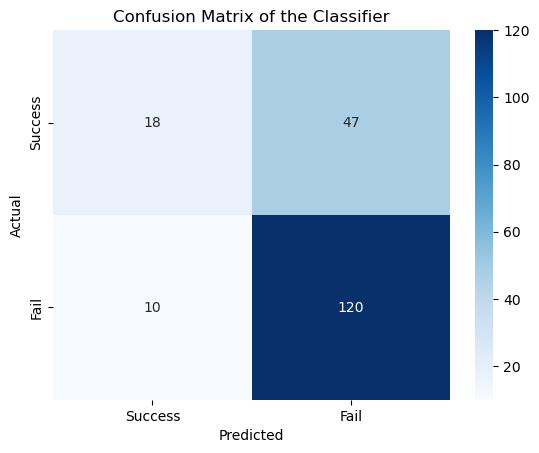

In [1078]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = model_pred,
          labels = ['Success', 'Fail'])